Домашнее задание:
- К вам приходит руководитель продукта “Интернет-магазин”
- И спрашивает про удержание клиентов и повторные покупки
- У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи
- Он просит вас сравнить, на сколько сейчас все хуже, чем в прошлом году? 

Данные лежат в папке занятия на сервере:
- есть транзакции (покупки) в интернет магазине, в том числе id клиента, id покупки, timestamp покупки и тп
- orders.csv, customers.csv

Ваши задачи: 
1. Проверить гипотезу руководителя продукта 
2. Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [66]:
%matplotlib inline

In [117]:
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")

In [118]:
customers.describe().transpose()

,count,unique,top,freq
id,793,793,CV-12805,1
name,793,793,John Lucas,1
segment,793,3,Consumer,409
state,793,41,California,161
city,793,252,New York City,68


In [119]:
orders.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5009.0,134608.398083,20229.279765,100006.000,117184.00,134271.00,152226.000,169999.000
sales,5009.0,458.614666,954.730953,0.556,37.63,151.96,512.064,23661.228


In [180]:
resulting_df = pd.merge(orders, customers, left_on='customer_id', right_on='id', how='left').drop(columns='id_y')
resulting_df = resulting_df.set_index('order_date')

In [181]:
resulting_df['name'].value_counts()

Emily Phan             17
Noel Staavos           13
Patrick Gardner        13
Joel Eaton             13
Chloris Kastensmidt    13
                       ..
Susan MacKendrick       1
Anemone Ratner          1
Anthony O'Donnell       1
Jenna Caffey            1
Theresa Coyne           1
Name: name, Length: 793, dtype: int64

In [182]:
resulting_df['ship_mode'].value_counts()

Standard    2994
Second       964
First        787
Same Day     264
Name: ship_mode, dtype: int64

In [183]:
resulting_df[resulting_df['name'] == 'Emily Phan']

,id_x,ship_mode,customer_id,sales,name,segment,state,city
order_date,,,,,,,,
2014-07-06,134278,First,EP-13915,559.9920,Emily Phan,Consumer,Illinois,Chicago
2015-06-21,123330,Standard,EP-13915,107.9760,Emily Phan,Consumer,Illinois,Chicago
2015-03-14,163587,Standard,EP-13915,688.4600,Emily Phan,Consumer,Illinois,Chicago
2016-10-11,113390,Standard,EP-13915,33.0640,Emily Phan,Consumer,Illinois,Chicago
2016-10-28,140641,Standard,EP-13915,38.1900,Emily Phan,Consumer,Illinois,Chicago
2017-12-18,102099,First,EP-13915,51.9900,Emily Phan,Consumer,Illinois,Chicago
2017-03-03,111815,Standard,EP-13915,280.9600,Emily Phan,Consumer,Illinois,Chicago
2017-12-13,122770,Standard,EP-13915,261.5200,Emily Phan,Consumer,Illinois,Chicago
2017-11-28,131303,Standard,EP-13915,62.6500,Emily Phan,Consumer,Illinois,Chicago


In [184]:
df_date_count = pd.DataFrame(index=pd.to_datetime(resulting_df.index))
df_date_count['count'] = 1
df_date_count = df_date_count.resample("M").sum()
df_date_count.shape

(48, 1)

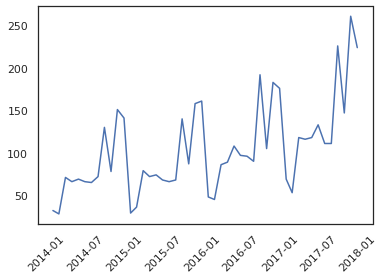

In [185]:
plt.plot(df_date_count.index, df_date_count['count'])
plt.xticks(rotation = 45)
plt.show()

In [186]:
resulting_df.reset_index(inplace=True)
resulting_df['order_month'] = pd.to_datetime(resulting_df['order_date']).dt.strftime('%Y-%m') 
cohorts = resulting_df.groupby('customer_id', as_index=False)['order_month'].min()
cohorts.rename(columns = {'order_month': 'cohort'}, inplace=True)
cohorts.head()

,customer_id,cohort
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02


In [187]:
resulting_df = pd.merge(resulting_df, cohorts, on='customer_id')
resulting_df['order_date'] = pd.to_datetime(resulting_df['order_date'])
resulting_df['cohort'] = pd.to_datetime(resulting_df['cohort'])
resulting_df.head()

,order_date,id_x,ship_mode,customer_id,sales,name,segment,state,city,order_month,cohort
0,2014-09-07,100006,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,2014-09,2014-09-01
1,2015-12-06,131884,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,2015-12,2014-09-01
2,2015-12-12,145065,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,2015-12,2014-09-01
3,2017-07-27,133046,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,2017-07,2014-09-01
4,2017-12-11,165099,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,2017-12,2014-09-01


In [190]:
resulting_df['order_month'] = resulting_df['order_date'].dt.strftime('%Y-%m')
resulting_df['cohort'] = resulting_df['cohort'].dt.strftime('%Y-%m')

In [192]:
resulting_df.head()

,order_date,id_x,ship_mode,customer_id,sales,name,segment,state,city,order_month,cohort
0,2014-09-07,100006,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,2014-09,2014-09
1,2015-12-06,131884,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,2015-12,2014-09
2,2015-12-12,145065,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,2015-12,2014-09
3,2017-07-27,133046,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,2017-07,2014-09
4,2017-12-11,165099,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,2017-12,2014-09


In [161]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['cohort_period'] = np.arange(len(df))
    return df

In [214]:
resulting_df_our_year = resulting_df[(resulting_df['order_date'] >= '2017-01-01') & (resulting_df['order_date'] <= '2018-01-01')]
our_year = resulting_df_our_year[resulting_df_our_year['cohort'] >= '2017-01-01']

In [215]:
resulting_df_prev_year = resulting_df[(resulting_df['order_date'] >= '2016-01-01') & (resulting_df['order_date'] <= '2017-01-01')]
prev_year = resulting_df_prev_year[resulting_df_prev_year['cohort'] >= '2016-01-01']

In [295]:
def cohorts_plot(resulting_df) -> pd.DataFrame:
    cohorts_group = resulting_df.groupby(['cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
    cohorts_group.rename(columns={'customer_id': 'total_users', 'id_x': 'total_orders'}, inplace=True)
    cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
    cohorts_group.reset_index(inplace=True)
    cohorts_group.set_index(['cohort', 'cohort_period'], inplace=True) 
    cohort_group_size = cohorts_group['total_users'].groupby(level=0).first()
    user_retention = cohorts_group['total_users'].unstack(0).divide(cohort_group_size, axis=1)
    user_retention.replace(np.NaN, 0.0, inplace=True)
    user_retention = user_retention.T
    user_retention.index = pd.to_datetime(user_retention.index, format='%Y-%m')
    user_retention = user_retention.resample('M').ffill()
    user_retention.index = list(map(lambda x: f"{x.year}-{x.month}", user_retention.index))

    sns.set(style='white')
    plt.figure(figsize=(16, 10))
    plt.title('Cohorts: User Retention')
    sns.heatmap(user_retention, mask=user_retention.isnull(), annot=True, fmt='.0%')
    return user_retention

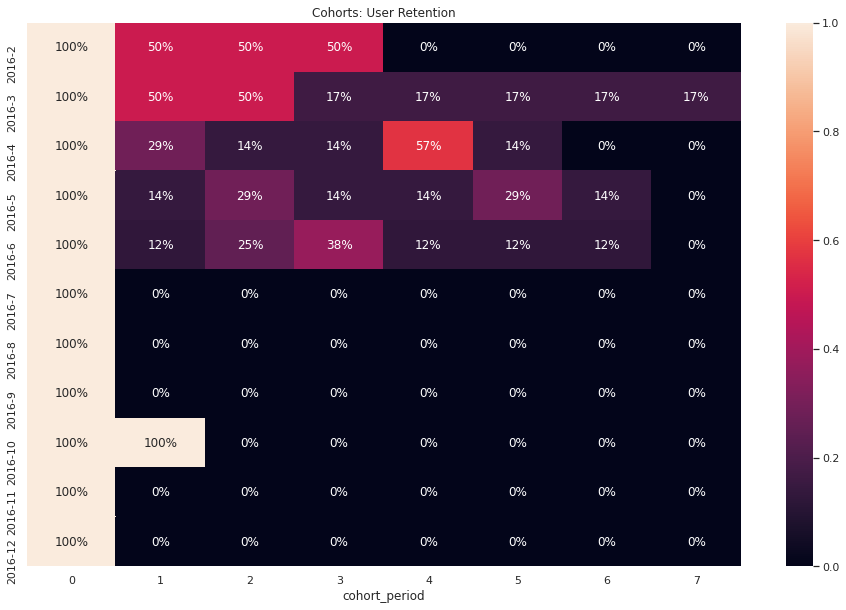

In [296]:
prev_retention = cohorts_plot(prev_year)

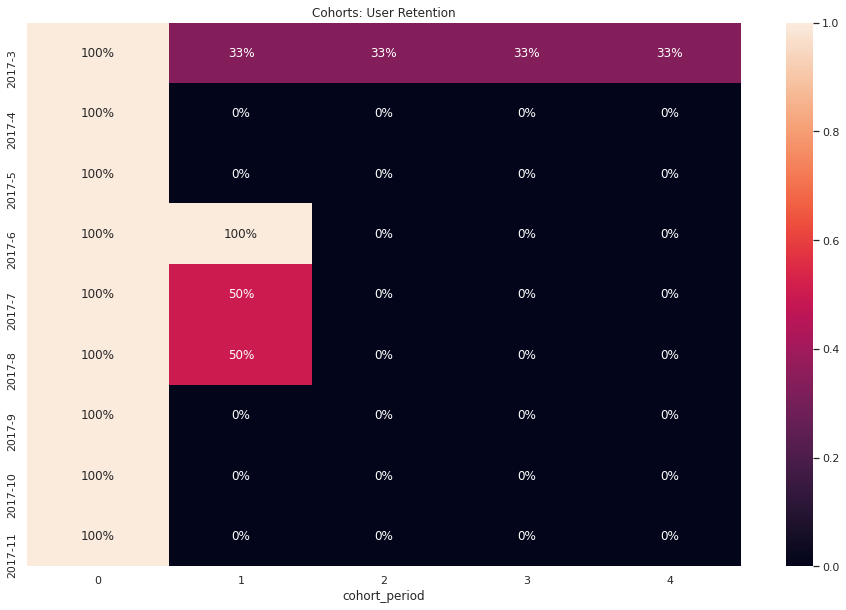

In [297]:
our_retention = cohorts_plot(our_year)

In [298]:
resulting_df_two_years = resulting_df[(resulting_df['order_date'] >= '2016-01-01') & (resulting_df['order_date'] <= '2018-01-01')]
two_years = resulting_df_two_years[resulting_df_two_years['cohort'] >= '2016-01-01']

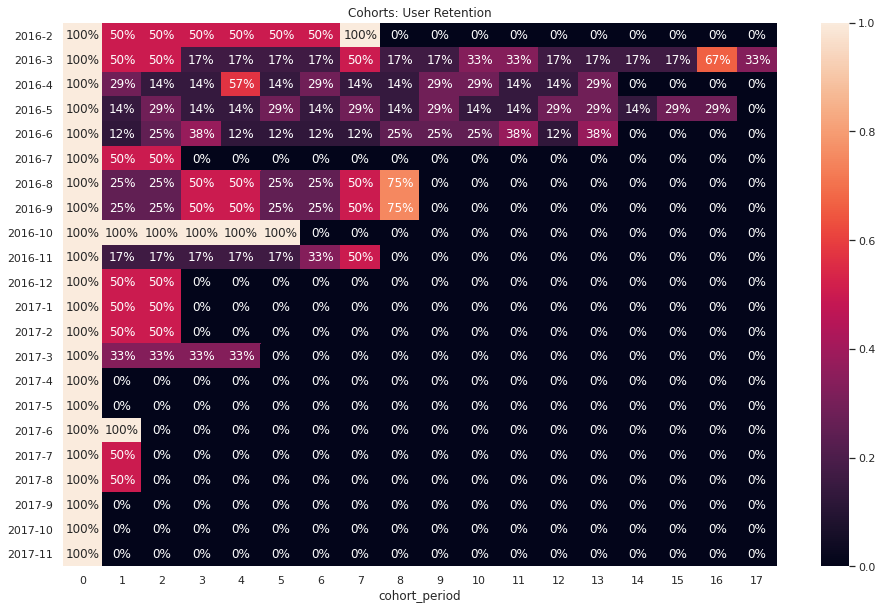

In [299]:
two_years_retention = cohorts_plot(two_years)

In [300]:
our_retention

cohort_period,0,1,2,3,4
2017-3,1.0,0.333333,0.333333,0.333333,0.333333
2017-4,1.0,0.000000,0.000000,0.000000,0.000000
2017-5,1.0,0.000000,0.000000,0.000000,0.000000
2017-6,1.0,1.000000,0.000000,0.000000,0.000000
2017-7,1.0,0.500000,0.000000,0.000000,0.000000
2017-8,1.0,0.500000,0.000000,0.000000,0.000000
2017-9,1.0,0.000000,0.000000,0.000000,0.000000
2017-10,1.0,0.000000,0.000000,0.000000,0.000000
2017-11,1.0,0.000000,0.000000,0.000000,0.000000


In [301]:
prev_retention

cohort_period,0,1,2,3,4,5,6,7
2016-2,1.0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
2016-3,1.0,0.500000,0.500000,0.166667,0.166667,0.166667,0.166667,0.166667
2016-4,1.0,0.285714,0.142857,0.142857,0.571429,0.142857,0.000000,0.000000
2016-5,1.0,0.142857,0.285714,0.142857,0.142857,0.285714,0.142857,0.000000
2016-6,1.0,0.125000,0.250000,0.375000,0.125000,0.125000,0.125000,0.000000
2016-7,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-8,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-9,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-11,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [302]:
two_years_retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
2016-2,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-3,1.0,0.500000,0.500000,0.166667,0.166667,0.166667,0.166667,0.500000,0.166667,0.166667,0.333333,0.333333,0.166667,0.166667,0.166667,0.166667,0.666667,0.333333
2016-4,1.0,0.285714,0.142857,0.142857,0.571429,0.142857,0.285714,0.142857,0.142857,0.285714,0.285714,0.142857,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000
2016-5,1.0,0.142857,0.285714,0.142857,0.142857,0.285714,0.142857,0.285714,0.142857,0.285714,0.142857,0.142857,0.285714,0.285714,0.142857,0.285714,0.285714,0.000000
2016-6,1.0,0.125000,0.250000,0.375000,0.125000,0.125000,0.125000,0.125000,0.250000,0.250000,0.250000,0.375000,0.125000,0.375000,0.000000,0.000000,0.000000,0.000000
2016-7,1.0,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-8,1.0,0.250000,0.250000,0.500000,0.500000,0.250000,0.250000,0.500000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-9,1.0,0.250000,0.250000,0.500000,0.500000,0.250000,0.250000,0.500000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-11,1.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
